# Tensor Flow

In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import pickle
import matplotlib.patches as patches

%matplotlib widget

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

## Model

In [2]:
base_model = tf.keras.applications.VGG16(weights='imagenet',
    input_shape=(256, 256, 3),
    include_top=False)
base_model.trainable = False

In [3]:
# flatten the max-pooling output of VGG
flatten = base_model.output
flatten = layers.Flatten()(flatten)

# Build layers to find the bounding box
bboxHead = layers.Dropout(0.5)(flatten)
bboxHead = layers.Dense(128, activation="relu")(bboxHead)
bboxHead = layers.Dense(64, activation="relu")(bboxHead)
bboxHead = layers.Dense(32, activation="relu")(bboxHead)
bboxHead = layers.Dense(4, activation="sigmoid")(bboxHead)

# Construct the model
model = tf.keras.Model(inputs=base_model.input, outputs=bboxHead)

model.compile(optimizer='adam', loss='mse')


In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [3]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(256,256,3)))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(32, (3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(32, (3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(32, (3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(32, (3,3), activation='relu'))
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.65))
# model.add(layers.Dense(1024, activation='relu'))
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(4))
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

In [ ]:
\begin{tabular}{@{}llll@{}}
\toprule
Layer (type) & Output Shape & Param # \
\midrule
conv2d (Conv2D) & (None, 252, 252, 32) & 2432 \
max_pooling2d (MaxPooling2D) & (None, 126, 126, 32) & 0 \
conv2d_1 (Conv2D) & (None, 124, 124, 32) & 9248 \
max_pooling2d_1 (MaxPooling 2D) & (None, 62, 62, 32) & 0 \
conv2d_2 (Conv2D) & (None, 60, 60, 32) & 9248 \
max_pooling2d_2 (MaxPooling 2D) & (None, 30, 30, 32) & 0 \
conv2d_3 (Conv2D) & (None, 28, 28, 32) & 9248 \
max_pooling2d_3 (MaxPooling 2D) & (None, 14, 14, 32) & 0 \
conv2d_4 (Conv2D) & (None, 12, 12, 32) & 9248 \
flatten (Flatten) & (None, 4608) & 0 \
dropout (Dropout) & (None, 4608) & 0 \
dense (Dense) & (None, 1024) & 4719616 \
dense_1 (Dense) & (None, 256) & 262400 \
dense_2 (Dense) & (None, 64) & 16448 \
dense_3 (Dense) & (None, 4) & 260 \
\midrule
Total params & 5,038,148 \
Trainable params & 5,038,148 \
Non-trainable params & 0 \
\bottomrule
\end{tabular}

Modified learning rate from 0.0002 to 0.00005

In [4]:
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00002),
#               loss=tf.keras.losses.MeanSquaredError(),)

## Import data

### Only original sources

In [9]:
filenames = os.listdir('labeled_data')

sources = []

for filename in filenames:
    if filename.startswith('sources'):
        print(filename)
        with open('labeled_data/' + filename, 'rb') as f:
            data = pickle.load(f)
            sources.extend(data)

sources_0.obj
sources_1.obj
sources_2.obj
sources_3.obj
sources_4.obj
sources_5.obj
sources_6.obj


In [13]:
print(len(sources))

700


### Import all sources

In [5]:
filenames = os.listdir('labeled_data')

sources = []

for filename in filenames:
    with open('labeled_data/' + filename, 'rb') as f:
        data = pickle.load(f)
        sources.extend(data)

In [9]:
print(len(sources))

4000


First time I tried 80 as the training size, that seemed to work well, but I haven't been able to replicate that early success...

In [6]:
trainingSize = 3800
testSize = len(sources)-1 - trainingSize
randomIndices = np.random.choice(len(sources), len(sources),replace=False)

In [7]:
train_images = np.empty((trainingSize, 256, 256, 3), dtype=np.float32)
train_labels = np.empty((trainingSize, 4), dtype=np.float32)
test_images = np.empty((testSize, 256, 256, 3), dtype=np.float32)
test_labels = np.empty((testSize, 4), dtype=np.float32)

In [35]:
# Loads the images and labels into the training and test sets

for i in range(trainingSize):
    source = sources[randomIndices[i]]
    images = np.dstack((source.images[0].data, source.images[1].data, source.images[2].data))
    (x0,x1) = (source.images[0].x0, source.images[0].x1)
    (y0,y1) = (source.images[0].y0, source.images[0].y1)
    labels = np.array([x0,x1,y0,y1])
    train_images[i] = images
    train_labels[i] = labels
for i in range(testSize):
    source = sources[randomIndices[i+trainingSize]]
    images = np.dstack((source.images[0].data, source.images[1].data, source.images[2].data))
    (x0,x1) = (source.images[0].x0, source.images[0].x1)
    (y0,y1) = (source.images[0].y0, source.images[0].y1)
    labels = np.array([x0,x1,y0,y1])
    test_images[i] = images
    test_labels[i] = labels
print("Train: ", train_images.shape)
print("Train Labels: ", train_labels.shape)
print("Test: ", test_images.shape)
print("Test Labels: ", test_labels.shape)

Train:  (3800, 256, 256, 3)
Train Labels:  (3800, 4)
Test:  (199, 256, 256, 3)
Test Labels:  (199, 4)


### Data normalization

In [35]:
test_images[1:10,:,:,0].max(axis=(1,2))

array([0.00210626, 0.00482879, 0.0062318 , 0.00998796, 0.00624922,
       0.00103756, 0.00259635, 0.00438517, 0.00281387], dtype=float32)

In [37]:
def normalize_WISE(images):
    for band in [1,2]: # WISE bands
        images[:,:,:,band] = np.log10(images[:,:,:,band] - np.min(images[:,:,:,band], axis=(1,2), keepdims=True)) # Set min to 0 and log10
        images[:,:,:,band] = np.clip(images[:,:,:,band], np.median(images[:,:,:,band], axis=(1,2))[:, None, None], np.inf) # Clip to median
        images[:,:,:,band] = images[:,:,:,band] - images[:,:,:,band].min(axis=(1,2), keepdims=True) # Set min to 0
        images[:,:,:,band] = images[:,:,:,band] / images[:,:,:,band].max() # Set max to 1
    for band in [0]: # VLASS band
        print("VLASS")
        images[:,:,:,band] = images[:,:,:,band] - images[:,:,:,band].min(axis=(1,2), keepdims=True) # Set min to 0
        images[:,:,:,band] = images[:,:,:,band] / images[:,:,:,band].max() # Set max to 1
    return images

In [38]:
train_images = normalize_WISE(train_images) # Ignore warnings about divide by zero
test_images  = normalize_WISE(test_images)

C:\Users\peg20\AppData\Local\Temp\ipykernel_16964\3036038255.py:3: RuntimeWarning: divide by zero encountered in log10
  images[:,:,:,band] = np.log10(images[:,:,:,band] - np.min(images[:,:,:,band], axis=(1,2), keepdims=True)) # Set min to 0 and log10


VLASS
VLASS


In [39]:
# Check that images were rescaled
for band in range(3):
    ind = np.argpartition(train_images[:,:,:,band].flatten(), -10)[-10:]
    mean = np.mean(train_images[0:10,:,:,band], axis=(1,2))
    print('Max in Band ', band, ': ', train_images[:,:,:,band].flatten()[ind])
    print('Mean: ', mean)

Max in Band  0 :  [0.9987865  0.9987865  0.99912834 0.99912834 1.         0.99912834
 1.         1.         0.99912834 1.        ]
Mean:  [0.00171803 0.00156307 0.00215177 0.00178542 0.00186527 0.00171483
 0.00193459 0.00576459 0.00183157 0.00182095]
Max in Band  1 :  [0.99931926 0.99953103 0.99953103 0.99931926 0.99953103 1.
 1.         0.99953103 1.         1.        ]
Mean:  [0.03916258 0.03806275 0.06066313 0.04224031 0.01782639 0.0260352
 0.02210549 0.07226111 0.04437036 0.05917609]
Max in Band  2 :  [0.9995224  0.999783   0.999783   0.99992925 1.         1.
 0.999783   1.         0.99992925 0.99992925]
Mean:  [0.0304087  0.02586675 0.04678997 0.02229998 0.01523686 0.01333417
 0.01378718 0.07266952 0.02935684 0.05807603]


Rescale bounding boxes to be between 0,1

In [40]:
train_labels = train_labels / 256 # Normalize labels
test_labels = test_labels / 256 # Normalize labels

## Model Fitting/Training

Below is the normal fitting method.

In [12]:
history = model.fit(train_images, train_labels, epochs=20)

Epoch 1/50
119/119 [==============================] - 10s 37ms/step - loss: 5314.0122
Epoch 2/50
119/119 [==============================] - 4s 35ms/step - loss: 3612.3574
Epoch 3/50
119/119 [==============================] - 4s 34ms/step - loss: 3587.1396
Epoch 4/50
119/119 [==============================] - 4s 34ms/step - loss: 3592.0911
Epoch 5/50
119/119 [==============================] - 4s 34ms/step - loss: 3566.8394
Epoch 6/50
119/119 [==============================] - 4s 34ms/step - loss: 3555.7913
Epoch 7/50
119/119 [==============================] - 4s 34ms/step - loss: 3576.5322
Epoch 8/50
119/119 [==============================] - 4s 35ms/step - loss: 3557.4917
Epoch 9/50
119/119 [==============================] - 4s 36ms/step - loss: 3524.0500
Epoch 10/50
119/119 [==============================] - 4s 35ms/step - loss: 3525.5061
Epoch 11/50
119/119 [==============================] - 4s 35ms/step - loss: 3520.0178
Epoch 12/50
119/119 [==============================] - 4s 35ms

Not entirely sure if it's fine to have the validation data in here below

In [41]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/20
119/119 [==============================] - 22s 123ms/step - loss: 0.0620 - val_loss: 0.0584
Epoch 2/20
119/119 [==============================] - 13s 109ms/step - loss: 0.0560 - val_loss: 0.0618
Epoch 3/20
119/119 [==============================] - 13s 109ms/step - loss: 0.0555 - val_loss: 0.0592
Epoch 4/20
119/119 [==============================] - 13s 109ms/step - loss: 0.0549 - val_loss: 0.0566
Epoch 5/20
119/119 [==============================] - 13s 109ms/step - loss: 0.0546 - val_loss: 0.0597
Epoch 6/20
119/119 [==============================] - 13s 109ms/step - loss: 0.0543 - val_loss: 0.0572
Epoch 7/20
119/119 [==============================] - 13s 109ms/step - loss: 0.0542 - val_loss: 0.0567
Epoch 8/20
119/119 [==============================] - 13s 110ms/step - loss: 0.0538 - val_loss: 0.0571
Epoch 9/20
119/119 [==============================] - 13s 109ms/step - loss: 0.0538 - val_loss: 0.0567
Epoch 10/20
119/119 [==============================] - 13s 109ms/step - l

In [15]:
model.predict(test_images[0:10])

1/1 [==============================] - 1s 831ms/step


array([[0.4998364 , 0.5001713 , 0.5000611 , 0.50047976],
       [0.4998364 , 0.5001713 , 0.5000611 , 0.50047976],
       [0.4998364 , 0.5001713 , 0.5000611 , 0.50047976],
       [0.4998364 , 0.5001713 , 0.5000611 , 0.50047976],
       [0.4998364 , 0.5001713 , 0.5000611 , 0.50047976],
       [0.4998364 , 0.5001713 , 0.5000611 , 0.50047976],
       [0.4998364 , 0.5001713 , 0.5000611 , 0.50047976],
       [0.4998364 , 0.5001713 , 0.5000611 , 0.50047976],
       [0.4998364 , 0.5001713 , 0.5000611 , 0.50047976],
       [0.4998364 , 0.5001713 , 0.5000611 , 0.50047976]], dtype=float32)

In [31]:
test_labels[0:10]

array([[0.57421875, 0.42578125, 0.41015625, 0.55859375],
       [0.6015625 , 0.3671875 , 0.3515625 , 0.55859375],
       [0.6015625 , 0.40625   , 0.60546875, 0.3984375 ],
       [1.        , 0.        , 0.        , 1.        ],
       [0.49609375, 0.23046875, 0.27734375, 0.54296875],
       [0.55859375, 0.46484375, 0.4453125 , 0.55859375],
       [0.5859375 , 0.390625  , 0.4296875 , 0.58984375],
       [0.64453125, 0.44140625, 0.5234375 , 0.3671875 ],
       [0.421875  , 0.625     , 0.59765625, 0.390625  ],
       [0.5       , 0.33203125, 0.3515625 , 0.515625  ]], dtype=float32)

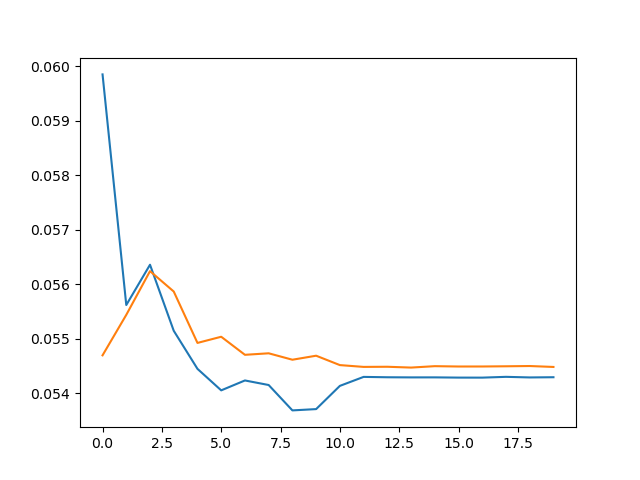

In [32]:
plt.close()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [126]:
model.evaluate(test_images, test_labels)

1/1 [==============================] - 0s 288ms/step - loss: 34160.9492


34160.94921875

## Show predicted boxes

In [14]:
dataset = test_images[0:10]
data_labels = test_labels[0:10]

In [15]:
predict_labels = model.predict(dataset)

1/1 [==============================] - 0s 446ms/step


In [15]:
print(predict_labels)

[[173.79008  132.11752  130.6971   154.8621  ]
 [122.14818  124.04784  107.4975   132.22395 ]
 [111.08929  147.19075  140.40878  116.23255 ]
 [ 87.00858  163.76248  139.76776  101.22342 ]
 [102.99132  145.32631  131.15886  114.509636]
 [127.2162   130.83882  123.625046 135.3113  ]
 [124.38137  145.83115  126.29699  124.78586 ]
 [153.88081  106.654236 123.83201   75.409546]
 [129.75143  126.72189  122.626755 131.54164 ]
 [145.38382   72.385864  89.83798  155.19537 ]]


In [16]:
print(data_labels)

[[124. 167. 164. 118.]
 [106. 151. 105. 144.]
 [163.  91. 158.  96.]
 [ 70. 121.  94. 139.]
 [101. 151. 152. 105.]
 [ 95. 155. 107. 156.]
 [153. 113. 113. 154.]
 [ 57. 111. 131.  72.]
 [ 90. 154. 159. 104.]
 [ 51. 145. 107. 171.]]


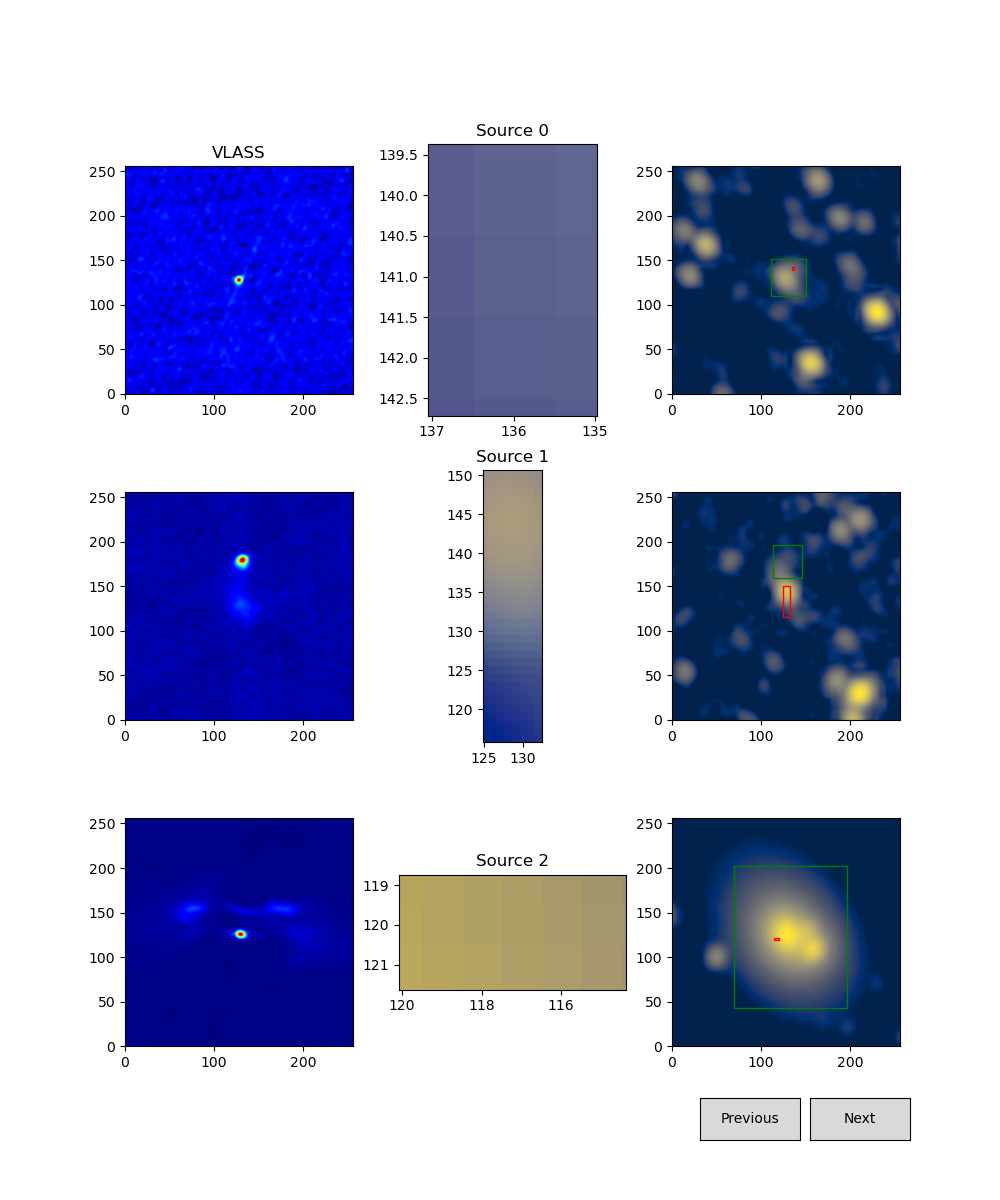

IndexError: index 10 is out of bounds for axis 0 with size 10

In [16]:
plt.close()

sourceLength = len(dataset)
nSources = 3

fig, ax = plt.subplots(nSources, 3, figsize=(10, 12))
ax[0][0].set_title('VLASS')
ax[0][1].set_title('VLASS + WISE')
ax[0][2].set_title('WISE')

class Index:
    ind = 0

    def next(self, event):
        self.ind += nSources
        i = self.ind % sourceLength
        self.showFigures()
        plt.draw()

    def prev(self, event):
        self.ind -= nSources
        i = self.ind % sourceLength
        self.showFigures()
        plt.draw()

    def showFigures(self):
        for i in range(nSources):
            (px0,px1,py0,py1) = predict_labels[self.ind+i]
            (x0,x1,y0,y1) = data_labels[self.ind+i]
            ax[i][0].imshow(dataset[i+self.ind,:,:,0], origin='lower', cmap='jet')
            ax[i][0].set_xlim(0, 256); ax[i][0].set_ylim(0, 256)

            ax[i][1].title.set_text('Source '+str(i+self.ind))
            ax[i][1].imshow(dataset[i+self.ind,:,:,1], origin='lower', cmap='cividis')
            ax[i][1].imshow(dataset[i+self.ind,:,:,0], origin='lower', cmap='jet', alpha=0.2)
            ax[i][1].set_xlim(px0, px1)
            ax[i][1].set_ylim(py0, py1)

            ax[i][2].cla()
            ax[i][2].imshow(dataset[i+self.ind,:,:,1], origin='lower', cmap='cividis')
            ax[i][2].set_xlim(0, 256); ax[i][2].set_ylim(0, 256)
            
            # Create a Rectangle patch
            rect = patches.Rectangle((px0, py0), px1-px0, py1-py0, linewidth=1, edgecolor='r', facecolor='none')
            # Labeled rectangle
            rect2 = patches.Rectangle((x0, y0), x1-x0, y1-y0, linewidth=1, edgecolor='g', facecolor='none')

            # Add the patch to the final image
            ax[i][2].add_patch(rect)
            ax[i][2].add_patch(rect2)

callback = Index()
callback.showFigures()
axprev = fig.add_axes([0.7, 0.05, 0.1, 0.035])
axnext = fig.add_axes([0.81, 0.05, 0.1, 0.035])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()

In [22]:
test_images.shape

(29, 256, 256, 3)